In [1]:
#===============================================
# Basic Imports
BASE_FOLDER = '../../'
%run -i ..\..\utility\feature_extractor\JupyterLoad_feature_extractor.py
%run -i ..\..\utility\modeling\JupyterLoad_modeling.py

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, FastICA
from sklearn.preprocessing import PolynomialFeatures

%run -i miniutil_singel_pipe_eval_helper.py

df_summery = pd.DataFrame()

load feature_extractor_mother
load feature_extractor_mel_spectra
load feature_extractor_psd
load feature_extractor_ICA2
load feature_extractore_pre_nnFilterDenoise
load extractor_diagram_mother
load Simple_FIR_HP
load TimeSliceAppendActivation
load load_data
Load split_data
Load anomaly_detection_models
Load pseudo_supervised_models
Load tensorflow models
Load detection_pipe


# High Noise ID00

In [2]:
## Meta
machines = ['valve']
SNRs = ['min6dB']
IDs = ['00']
feat_discfile = '/dataset/extdia_v1_sporafic/valvemin6dB00_EDiaV1HPaug0TsSl_pandaDisc.pkl'

## PSD_raw

../..//dataset/extdia_v1_sporafic/valvemin6dB00_EDiaV1HPaug0TsSl_pandaDisc.pkl --> Done
...loading data
data loading completed

...preprocessing data
data preprocessing finished

...fitting the model
0.9693326003703392
model fitted successfully

...evaluating model
evaluation successfull, roc_auc: 0.9547348351105147
pipe saved to pickle


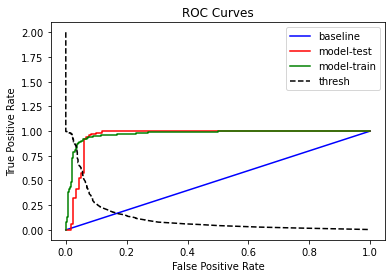

SVMn_valve00min6dBPSD_raw


In [3]:
df, tasks, npart = Make_TTsplit_and_task(feat_discfile,machines, SNRs,IDs,
                        features = [ 'PSD_raw'],
                        feat = {'function':'flat'})

preprocessing = [
    (StandardScaler, {}),
    #(PolynomialFeatures, {'degree': 2})
]

#modeling = (uni_LogisticRegression, {'C': 0.5, 'max_iter': 600})
modeling = (uni_svm, {'C': 0.1, 'degree':3,'kernel':'rbf'})

pipe = Pipe(preprocessing, modeling, True)
pipe.run_pipe(tasks[0])

name_of_test = pipe.model.name + 'n' +'_' + npart

pipetask_to_metrics(pipe,tasks[0],df_summery,name_of_test,0.5)
print(name_of_test)

## PSD_bssm

../..//dataset/extdia_v1_sporafic/valvemin6dB00_EDiaV1HPaug0TsSl_pandaDisc.pkl --> Done
...loading data
data loading completed

...preprocessing data
data preprocessing finished

...fitting the model
0.9723560727211514
model fitted successfully

...evaluating model
evaluation successfull, roc_auc: 0.9693524468610973
pipe saved to pickle


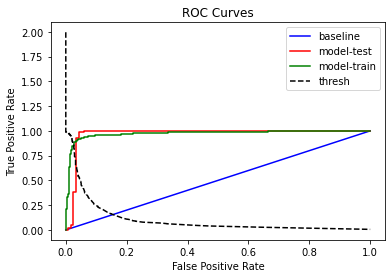

SVMn_valve00min6dBPSD_bssm


In [4]:
df, tasks, npart = Make_TTsplit_and_task(feat_discfile,machines, SNRs,IDs,
                        features = [ 'PSD_bssm'],
                        feat = {'function':'flat'})

preprocessing = [
    (StandardScaler, {}),
    #(PolynomialFeatures, {'degree': 2})
]

#modeling = (uni_LogisticRegression, {'C': 0.5, 'max_iter': 600})
modeling = (uni_svm, {'C': 0.1, 'degree':3,'kernel':'rbf'})

pipe = Pipe(preprocessing, modeling, True)
pipe.run_pipe(tasks[0])

name_of_test = pipe.model.name + 'n' +'_' + npart

pipetask_to_metrics(pipe,tasks[0],df_summery,name_of_test,0.5)
print(name_of_test)

# High Noise ID02

In [5]:
## Meta
machines = ['valve']
SNRs = ['min6dB']
IDs = ['02']
feat_discfile = '/dataset/extdia_v1_sporafic/valvemin6dB02_EDiaV1HPaug0TsSl_pandaDisc.pkl'

## PSD_raw

../..//dataset/extdia_v1_sporafic/valvemin6dB02_EDiaV1HPaug0TsSl_pandaDisc.pkl --> Done
...loading data
data loading completed

...preprocessing data
data preprocessing finished

...fitting the model
0.9648034383821555
model fitted successfully

...evaluating model
evaluation successfull, roc_auc: 0.9681249999999999
pipe saved to pickle


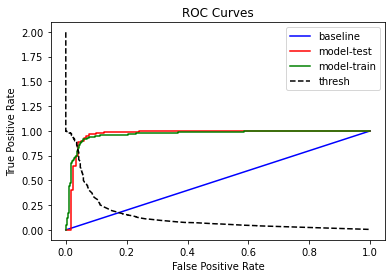

SVMn_valve02min6dBPSD_raw


In [6]:
df, tasks, npart = Make_TTsplit_and_task(feat_discfile,machines, SNRs,IDs,
                        features = [ 'PSD_raw'],
                        feat = {'function':'flat'})

preprocessing = [
    (StandardScaler, {}),
    #(PolynomialFeatures, {'degree': 2})
]

#modeling = (uni_LogisticRegression, {'C': 0.5, 'max_iter': 600})
modeling = (uni_svm, {'C': 0.1, 'degree':3,'kernel':'rbf'})

pipe = Pipe(preprocessing, modeling, True)
pipe.run_pipe(tasks[0])

name_of_test = pipe.model.name + 'n' +'_' + npart

pipetask_to_metrics(pipe,tasks[0],df_summery,name_of_test,0.5)
print(name_of_test)

## MEL_raw

../..//dataset/extdia_v1_sporafic/valvemin6dB02_EDiaV1HPaug0TsSl_pandaDisc.pkl --> Done
...loading data
data loading completed

...preprocessing data
data preprocessing finished

...fitting the model
0.9852173862742375
model fitted successfully

...evaluating model
evaluation successfull, roc_auc: 0.6159722222222221
pipe saved to pickle


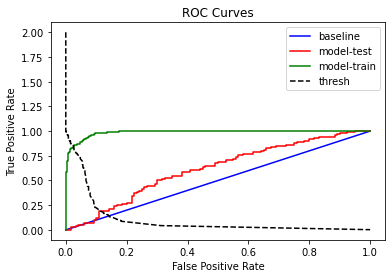

SVMpca_valve02min6dBMEL_raw


In [8]:
df, tasks, npart = Make_TTsplit_and_task(feat_discfile,machines, SNRs,IDs,
                        features = [ 'MEL_raw'],
                        feat = {'function':'flat'})

preprocessing = [
    (StandardScaler, {}),
    (PCA,{'n_components':64})
    #(PolynomialFeatures, {'degree': 2})
]

#modeling = (uni_LogisticRegression, {'C': 0.5, 'max_iter': 600})
modeling = (uni_svm, {'C': 0.1, 'degree':3,'kernel':'rbf'})

pipe = Pipe(preprocessing, modeling, True)
pipe.run_pipe(tasks[0])

name_of_test = pipe.model.name + 'pca' +'_' + npart

pipetask_to_metrics(pipe,tasks[0],df_summery,name_of_test,0.5)
print(name_of_test)

# Summery 

In [9]:
df_summery.to_pickle('S01_summerys/S01_SVM_valve')